In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/DASH-USD.csv')

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-08-17,28.407610,28.656715,24.334623,25.847975,25.847975,53361829.0
362,2023-08-18,25.853519,26.641645,25.780844,26.479654,26.479654,49196275.0
363,2023-08-19,NaN,NaN,NaN,NaN,NaN,NaN
364,2023-08-20,NaN,NaN,NaN,NaN,NaN,NaN
365,2023-08-21,27.023598,27.031387,26.234550,26.704763,26.704763,38799924.0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-21,45.677773,47.448467,45.520359,46.878952,46.878952,69130698.0
1,2022-08-22,46.866852,47.252754,44.446766,47.249470,47.249470,84102511.0
2,2022-08-23,47.251759,48.734455,45.837662,48.538738,48.538738,105331417.0
3,2022-08-24,48.537094,50.479523,47.406052,49.273899,49.273899,108608415.0
4,2022-08-25,49.270771,50.115456,48.827320,49.247395,49.247395,96749150.0


In [ ]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [ ]:
df.fillna(method='bfill', inplace=True)

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
train = df.iloc[0:int(len(df)*0.8),:]
test = df.iloc[int(len(df)*0.8):,:]

In [ ]:
train.shape

(292, 7)

In [ ]:
test.shape

(74, 7)

In [ ]:
X_train = []
Y_train = []
#3 dena nazad:
for i in range(0,len(train)-3):
  x = train.iloc[i:(i+3),4]
  y = train.iloc[i+3,4]
  X_train.append(x)
  Y_train.append(y)

In [ ]:
X_train

[0    46.878952
 1    47.249470
 2    48.538738
 Name: Close, dtype: float64,
 1    47.249470
 2    48.538738
 3    49.273899
 Name: Close, dtype: float64,
 2    48.538738
 3    49.273899
 4    49.247395
 Name: Close, dtype: float64,
 3    49.273899
 4    49.247395
 5    44.251270
 Name: Close, dtype: float64,
 4    49.247395
 5    44.251270
 6    45.171082
 Name: Close, dtype: float64,
 5    44.251270
 6    45.171082
 7    44.239807
 Name: Close, dtype: float64,
 6    45.171082
 7    44.239807
 8    47.471581
 Name: Close, dtype: float64,
 7    44.239807
 8    47.471581
 9    45.643017
 Name: Close, dtype: float64,
 8     47.471581
 9     45.643017
 10    44.616138
 Name: Close, dtype: float64,
 9     45.643017
 10    44.616138
 11    44.741657
 Name: Close, dtype: float64,
 10    44.616138
 11    44.741657
 12    45.698742
 Name: Close, dtype: float64,
 11    44.741657
 12    45.698742
 13    46.721119
 Name: Close, dtype: float64,
 12    45.698742
 13    46.721119
 14    47.562065
 

In [ ]:
X_test = []
Y_test = []
#3 dena nazad:
for i in range(0,len(test)-3):
  x = test.iloc[i:(i+3),4]
  y = test.iloc[i+3,4]
  X_test.append(x)
  Y_test.append(y)

In [ ]:
import numpy as np

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [ ]:
X_train.shape

(289, 1, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(100,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))

In [ ]:
model.add(LSTM(64,activation='relu'))

In [ ]:
model.add(Dense(1,activation='linear'))

In [ ]:

model.compile(loss='mse',optimizer='adam')

In [ ]:
history = model.fit(X_train,Y_train,epochs=80,batch_size=64,validation_split=0.2,shuffle=False,verbose=2)

Epoch 1/80
4/4 - 5s - loss: 2456.1475 - val_loss: 2097.8665 - 5s/epoch - 1s/step
Epoch 2/80
4/4 - 0s - loss: 2367.4316 - val_loss: 2009.5188 - 93ms/epoch - 23ms/step
Epoch 3/80
4/4 - 0s - loss: 2252.6567 - val_loss: 1884.4781 - 92ms/epoch - 23ms/step
Epoch 4/80
4/4 - 0s - loss: 2084.9055 - val_loss: 1699.1184 - 89ms/epoch - 22ms/step
Epoch 5/80
4/4 - 0s - loss: 1838.9115 - val_loss: 1430.0281 - 87ms/epoch - 22ms/step
Epoch 6/80
4/4 - 0s - loss: 1496.9427 - val_loss: 1065.3278 - 91ms/epoch - 23ms/step
Epoch 7/80
4/4 - 0s - loss: 1044.5220 - val_loss: 613.7094 - 88ms/epoch - 22ms/step
Epoch 8/80
4/4 - 0s - loss: 517.5326 - val_loss: 182.1730 - 96ms/epoch - 24ms/step
Epoch 9/80
4/4 - 0s - loss: 104.5837 - val_loss: 5.0468 - 111ms/epoch - 28ms/step
Epoch 10/80
4/4 - 0s - loss: 57.5889 - val_loss: 117.3532 - 118ms/epoch - 29ms/step
Epoch 11/80
4/4 - 0s - loss: 119.8771 - val_loss: 78.8858 - 93ms/epoch - 23ms/step
Epoch 12/80
4/4 - 0s - loss: 44.7515 - val_loss: 12.3981 - 95ms/epoch - 24ms/s

In [ ]:
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


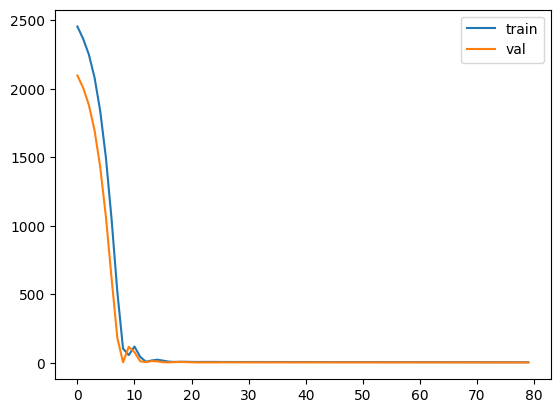

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,y_pred)

0.7835605022897381